In [71]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
print(datetime.datetime.now())
from matplotlib import pyplot as plt


2022-07-20 10:57:46.982351


In [72]:
!pwd

/Users/orenkobo/Desktop/PhD/Aim1/Aim1/OutputsAnalyser/ZZZ_notebooks/Notebooks__For_Paper/EDA


In [73]:
df = pd.read_csv("/Users/orenkobo/Desktop/PhD/HebLingStudy/ts_data/Artifacts2/df_new_distilled_unsegmented_alldata_new_FINAL_paparanalysis_withETLingFeatures.csv",
                 index_col=None,
                 converters={'alephbert_enc': eval,
                             '1d_vgg_featuremap' : eval,
                             'x_gaze_location' : eval,
                             'x_gaze_location_normalized' : eval
                             # 'phq_label': bool
                             })
print(df.shape)
df.head(4)

(9696, 45)


,Subject,sentence_run_num,sentence_trial_num,Sentence,Sentence_type,set_num,fixation_words_order,word_type,word_value,word_idx,...,x_gaze_location_r_scaled,x_gaze_location_normalized,sentence_pupil_diameter_vec_normalized,Sentence_type_A,Sentence_type_B,Sentence_type_C,Sentence_type_D,Sentence_type_F,alephbert_enc,words_order
0,3,0,0,המוזיקה היתה נעימה ועוררה השראה בקרב קהל השומעים,A,17,בקרב(5)->השומעים(7)->השומעים(7)->קהל(6)->השומע...,target_word,השראה,4,...,"[0.0043134435657800185, 0.0007189072609633364,...","[0.0051108045183047585, 0.004941572580612548, ...","[0.9342230695900859, 0.9342230695900859, 0.934...",1,0,0,0,0,"[0.48126277029514314, 0.2406933257356286, -0.1...","['בקרב', 'השומעים', 'השומעים', 'קהל', 'השומעים..."
1,3,0,1,"כדי לתפוס דגים, הדייג הפליג למרחק",F,99,NaN,F,NaN,-1,...,"[-0.04324324324324324, -0.04324324324324324, -...","[-0.0036331125953984016, -0.003633112595398401...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,0,0,0,1,"[-0.14811759690443674, -0.9101220783260133, -0...",[]
2,3,0,2,אסף בנה מגדל עם הקוביות שקיבל מהוריו,F,99,NaN,F,NaN,-1,...,"[0.429406554472985, 0.43578387953941544, 0.439...","[0.02025723070370858, 0.020568880406842557, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,0,0,0,1,"[1.0683965989285045, -0.01104319178395801, -0....",[]
3,3,0,3,"לכבוד יום ההולדת של דנה, היא החליטה לתכנן מסיבה",F,99,NaN,F,NaN,-1,...,"[0.06306504961411247, 0.0798235942668137, 0.07...","[0.014577938367920082, 0.015349472710511953, 0...","[1.0000000000000009, 1.0000000000000009, 1.000...",0,0,0,0,1,"[0.9036410391330719, 0.4634173482656479, -1.17...",[]


In [74]:
def apply_phq_cutoff(df , neg_phq_cutoff, pos_phq_cutoff):
    df["phq_binary_label"] = [0.0 if x <= neg_phq_cutoff else 1.0 if x >= pos_phq_cutoff else "other" for x in df.phq_score]
    df = df[df.phq_binary_label!= 'other']
    return df

override_cutoff = [7, 8]
df = apply_phq_cutoff(df, neg_phq_cutoff = override_cutoff[0], pos_phq_cutoff = override_cutoff[1] )
df['is_experimental_sentence'] = [False if x=='F' else True for x in df.Sentence_type]
df

,Subject,sentence_run_num,sentence_trial_num,Sentence,Sentence_type,set_num,fixation_words_order,word_type,word_value,word_idx,...,sentence_pupil_diameter_vec_normalized,Sentence_type_A,Sentence_type_B,Sentence_type_C,Sentence_type_D,Sentence_type_F,alephbert_enc,words_order,phq_binary_label,is_experimental_sentence
0,3,0,0,המוזיקה היתה נעימה ועוררה השראה בקרב קהל השומעים,A,17,בקרב(5)->השומעים(7)->השומעים(7)->קהל(6)->השומע...,target_word,השראה,4,...,"[0.9342230695900859, 0.9342230695900859, 0.934...",1,0,0,0,0,"[0.48126277029514314, 0.2406933257356286, -0.1...","['בקרב', 'השומעים', 'השומעים', 'קהל', 'השומעים...",0.0,True
1,3,0,1,"כדי לתפוס דגים, הדייג הפליג למרחק",F,99,NaN,F,NaN,-1,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,0,0,0,1,"[-0.14811759690443674, -0.9101220783260133, -0...",[],0.0,False
2,3,0,2,אסף בנה מגדל עם הקוביות שקיבל מהוריו,F,99,NaN,F,NaN,-1,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,0,0,0,1,"[1.0683965989285045, -0.01104319178395801, -0....",[],0.0,False
3,3,0,3,"לכבוד יום ההולדת של דנה, היא החליטה לתכנן מסיבה",F,99,NaN,F,NaN,-1,...,"[1.0000000000000009, 1.0000000000000009, 1.000...",0,0,0,0,1,"[0.9036410391330719, 0.4634173482656479, -1.17...",[],0.0,False
4,3,0,4,"מכיוון שרצינו לאוורר את כל הבית, עברנו בחדרים ...",F,99,NaN,F,NaN,-1,...,"[0.5790754257907533, 0.5790754257907533, 0.579...",0,0,0,0,1,"[0.8396753600010505, 0.20849608902174693, -0.7...",[],0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9691,139,2,27,"ליוני היה פאנצ'ר, לכן היה צריך להחליף גלגל",F,99,NaN,F,NaN,-1,...,"[0.9289368959636156, 0.9289368959636156, 0.928...",0,0,0,0,1,"[0.5647261874242262, -0.40860897438092664, -0....",[],1.0,False
9692,139,2,28,"לאחר שראו את המודעה, המשפחה החליטה לאמץ כלב",F,99,NaN,F,NaN,-1,...,"[0.9793986636971046, 0.9793986636971046, 0.979...",0,0,0,0,1,"[1.006677230613099, 0.020554773923423555, -0.5...",[],1.0,False
9693,139,2,29,התושבים חיו באוויר ההרים ובריאותם היתה מעולה ל...,A,27,NaN,target_word,מעולה,6,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1,0,0,0,0,"[0.053297266364097595, -0.07538636246075232, -...",[],1.0,True
9694,139,2,30,הרומן היה שטחי והסטודנט קרא אותו בשקיקה במהלך ...,C,4,NaN,target_word,בשקיקה,6,...,"[0.9442186922792759, 0.9442186922792759, 0.944...",0,0,1,0,0,"[-0.11343806338581172, 0.3203997625546022, -0....",[],1.0,True


In [75]:
df.columns.tolist()

['Subject',
 'sentence_run_num',
 'sentence_trial_num',
 'Sentence',
 'Sentence_type',
 'set_num',
 'fixation_words_order',
 'word_type',
 'word_value',
 'word_idx',
 'first_fixation_duration',
 'second_fixation_duration',
 'total_gaze_duration',
 'num_of_fixations',
 'word_has_first_pass_regression',
 'regression_path_duration',
 'is_skipping_trial',
 'trial_total_distance_covered',
 'word_pupil_diameter_mean',
 'sentence_pupil_diameter_mean',
 'sentence_pupil_diameter_vec',
 'sentence_pixels_per_word',
 'target_word_x_range',
 'time_at_word',
 'looked_at_word_timestamps_vectors',
 'pupil_diameter_per_fixation_when_looked_at_word',
 'num_words_in_lexicon',
 'target_word_loc',
 'sentence_pupil_diameter_vec_mean',
 'phq_score',
 'phq_group',
 'x_gaze_location_orig',
 'x_gaze_location_rescaled',
 'x_gaze_location_minmax_scaled',
 'x_gaze_location_standard_scaled',
 'x_gaze_location_r_scaled',
 'x_gaze_location_normalized',
 'sentence_pupil_diameter_vec_normalized',
 'Sentence_type_A',
 '

In [76]:
sentence_level_ET_features = [ 'trial_total_distance_covered', 'sentence_pupil_diameter_mean', 'sentence_pupil_diameter_vec_mean']
roi_level_ET_features = ['first_fixation_duration', 'second_fixation_duration', 'time_at_word', 'total_gaze_duration','regression_path_duration','word_pupil_diameter_mean']

In [77]:
ET_features = roi_level_ET_features + sentence_level_ET_features

In [78]:
df = df[df.Sentence_type != 'F'].reset_index(drop=True)
df

,Subject,sentence_run_num,sentence_trial_num,Sentence,Sentence_type,set_num,fixation_words_order,word_type,word_value,word_idx,...,sentence_pupil_diameter_vec_normalized,Sentence_type_A,Sentence_type_B,Sentence_type_C,Sentence_type_D,Sentence_type_F,alephbert_enc,words_order,phq_binary_label,is_experimental_sentence
0,3,0,0,המוזיקה היתה נעימה ועוררה השראה בקרב קהל השומעים,A,17,בקרב(5)->השומעים(7)->השומעים(7)->קהל(6)->השומע...,target_word,השראה,4,...,"[0.9342230695900859, 0.9342230695900859, 0.934...",1,0,0,0,0,"[0.48126277029514314, 0.2406933257356286, -0.1...","['בקרב', 'השומעים', 'השומעים', 'קהל', 'השומעים...",0.0,True
1,3,0,5,מדיח הכלים מנקה היטב והצלחת הייתה מלוכלכת כאשר...,B,5,הייתה(5)->סיים(8)->סיים(8)->כאשר(7)->הייתה(5)-...,target_word,מלוכלכת,6,...,"[0.6307339449541285, 0.6307339449541285, 0.630...",0,1,0,0,0,"[0.420270673930645, 0.5096977961560091, -0.039...","['הייתה', 'סיים', 'סיים', 'כאשר', 'הייתה', 'הי...",0.0,True
2,3,0,10,השיעור הראשון היה מפוזר וגרם לאכזבה בקרב התלמידים,D,12,וגרם(4)->התלמידים(7)->התלמידים(7)->בקרב(6)->בק...,target_word,לאכזבה,5,...,"[1.0000000000000009, 1.0000000000000009, 1.000...",0,0,0,1,0,"[0.5234323978424072, -0.06153452545404434, -0....","['וגרם', 'התלמידים', 'התלמידים', 'בקרב', 'בקרב...",0.0,True
3,3,0,12,הסרט היה מצויין והביקורות היללו את הכותבים והש...,A,6,היללו(4)->הכותבים(6)->הכותבים(6)->היללו(4)->הי...,target_word,היללו,4,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1,0,0,0,0,"[0.5717063670357069, -0.10472972722103198, -0....","['היללו', 'הכותבים', 'הכותבים', 'היללו', 'הילל...",0.0,True
4,3,0,14,נעמה סיימה את התואר בהצטיינות וכעת חיה בעוני ב...,B,26,וכעת(5)->חיה(6)->בדירתה(8)->וכעת(5)->בהצטיינות...,target_word,בעוני,7,...,"[0.6598425196850393, 0.6598425196850393, 0.659...",0,1,0,0,0,"[-0.08683208872874577, 0.1162533313035965, 0.0...","['וכעת', 'חיה', 'בדירתה', 'וכעת', 'בהצטיינות',...",0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,139,2,24,הכלב של דני מת ודני היה עצוב כל אחר הצהריים,D,0,NaN,target_word,עצוב,6,...,"[0.967332462198992, 0.967332462198992, 0.96733...",0,0,0,1,0,"[0.3345297574996948, 0.5745943126268684, -0.27...",[],1.0,True
3228,139,2,26,דמי הניהול היו שערוריתיים והובילו לעזיבה של לק...,D,15,NaN,target_word,לעזיבה,5,...,"[0.9999999999999999, 0.9999999999999999, 0.999...",0,0,0,1,0,"[0.5156927326550851, -0.453199331003886, -0.60...",[],1.0,True
3229,139,2,29,התושבים חיו באוויר ההרים ובריאותם היתה מעולה ל...,A,27,NaN,target_word,מעולה,6,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1,0,0,0,0,"[0.053297266364097595, -0.07538636246075232, -...",[],1.0,True
3230,139,2,30,הרומן היה שטחי והסטודנט קרא אותו בשקיקה במהלך ...,C,4,NaN,target_word,בשקיקה,6,...,"[0.9442186922792759, 0.9442186922792759, 0.944...",0,0,1,0,0,"[-0.11343806338581172, 0.3203997625546022, -0....",[],1.0,True


first_fixation_duration 178.0 2.0


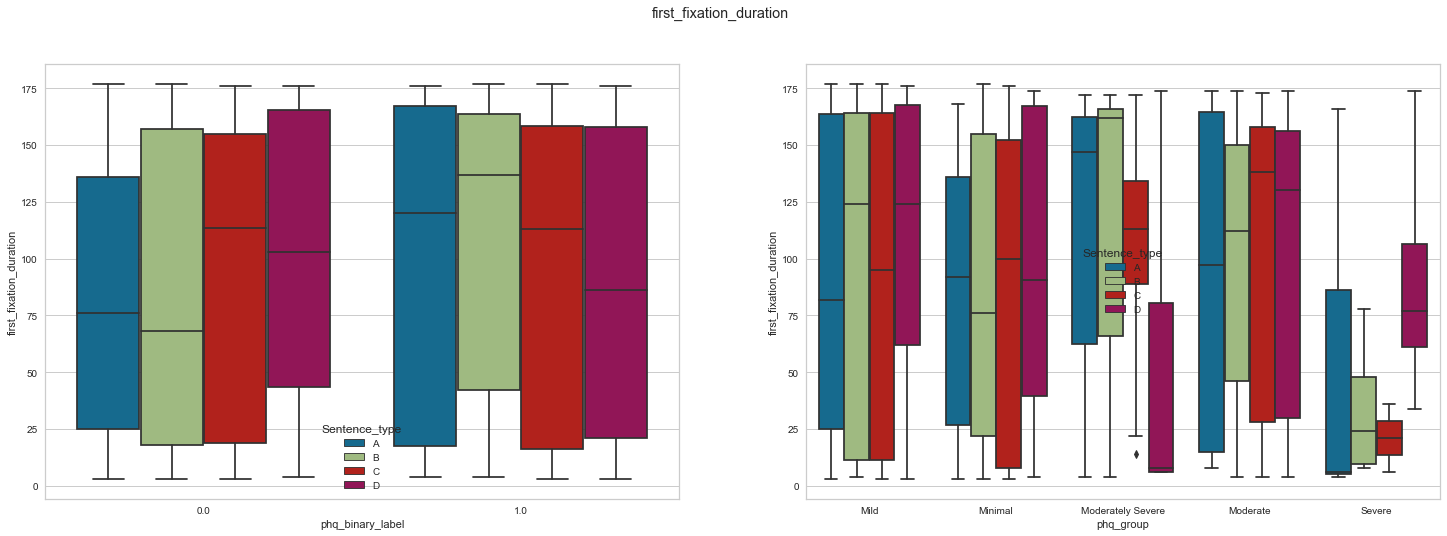

second_fixation_duration 180.0 4.0


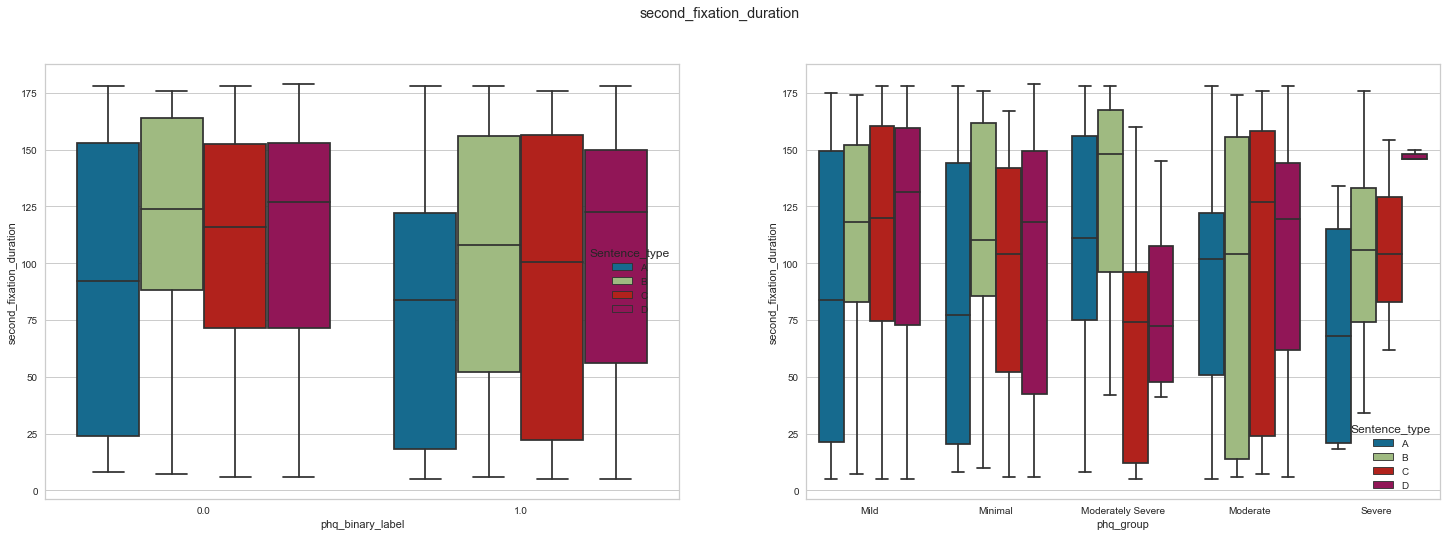

time_at_word 1509.4000000000005 198.0


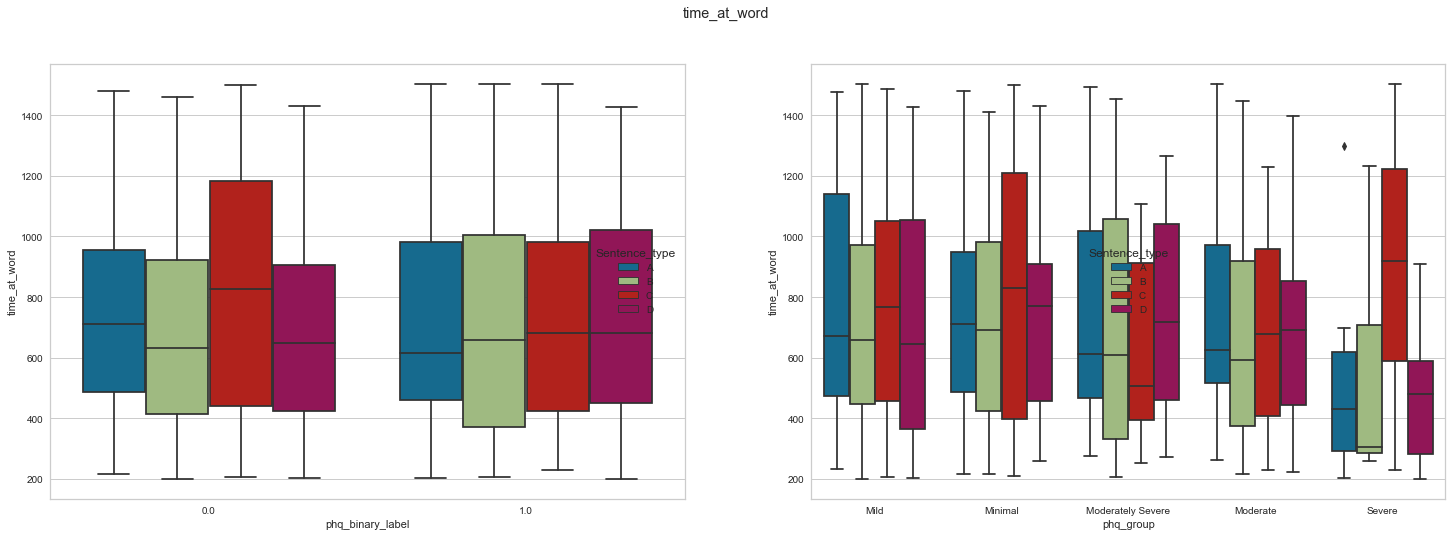

total_gaze_duration 1225.8000000000002 188.0


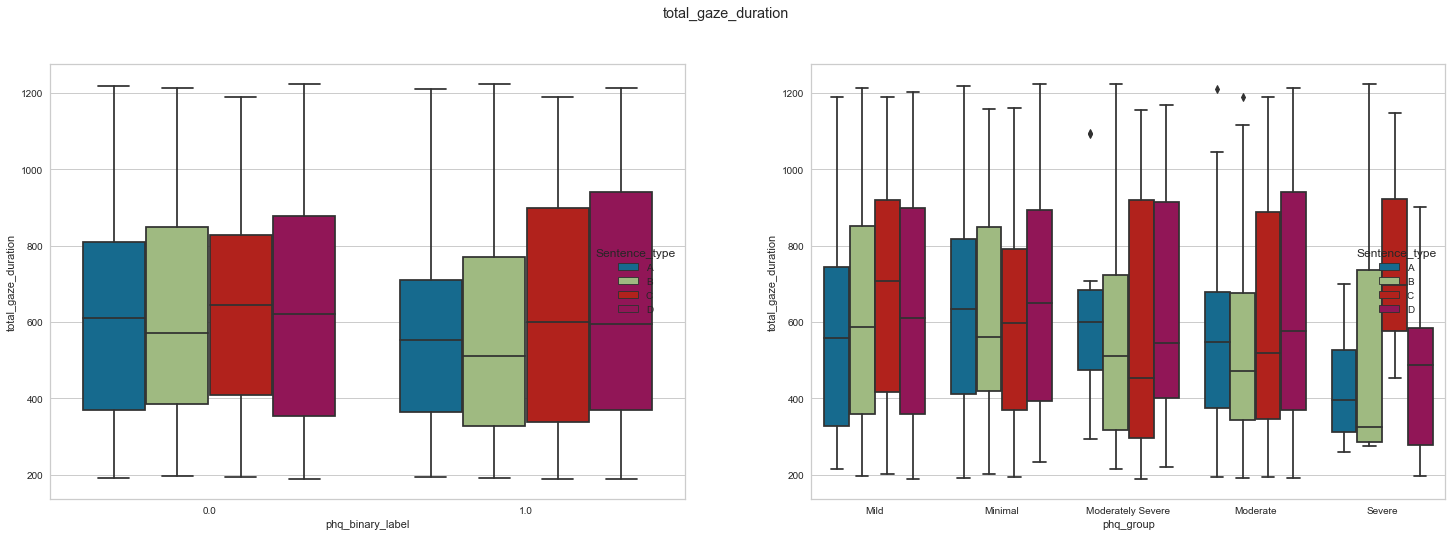

regression_path_duration 188.0 166.0


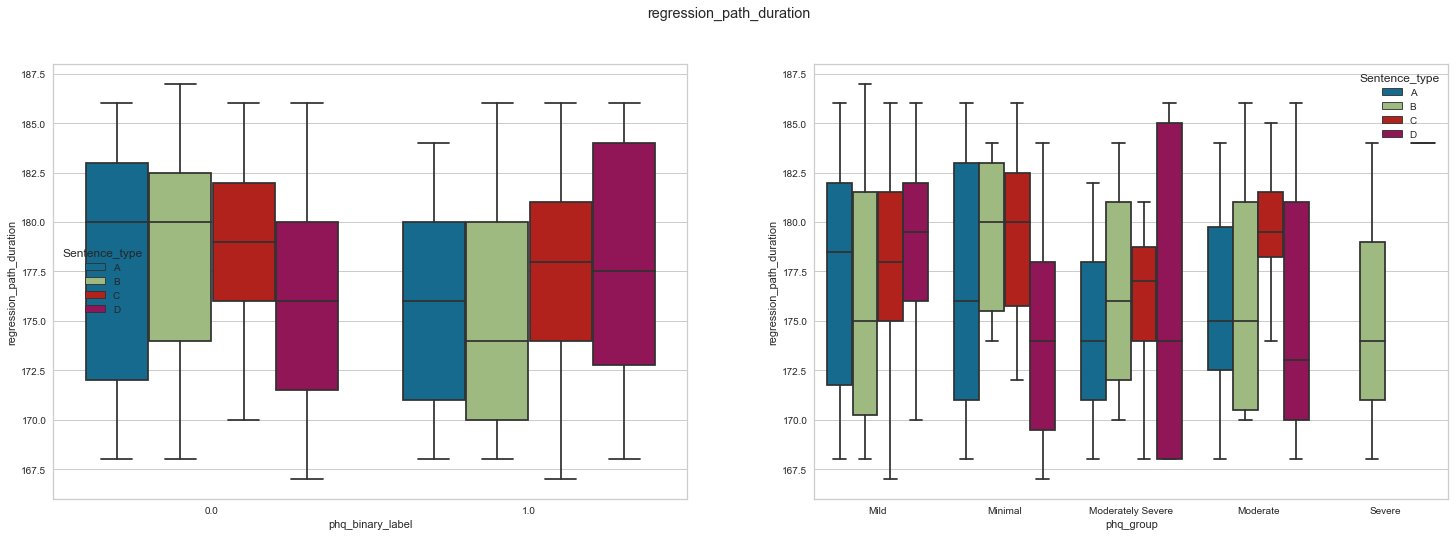

word_pupil_diameter_mean 7104.650729580142 3750.3659756848892


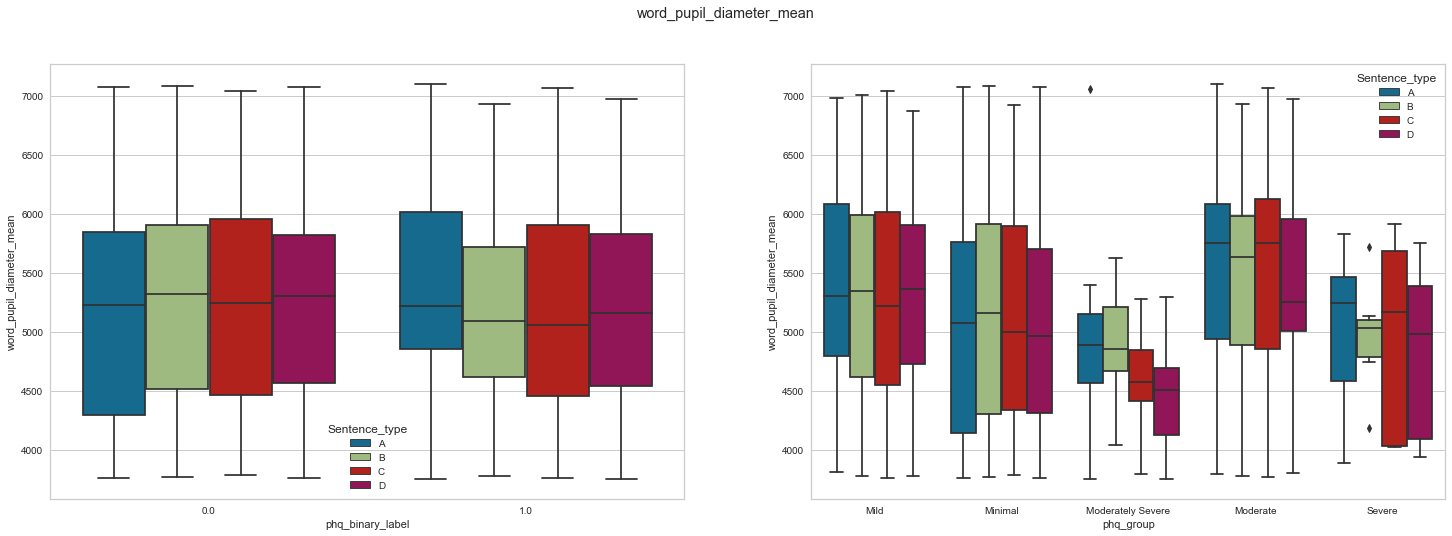

trial_total_distance_covered 9001.371862775868 3179.5707244904484


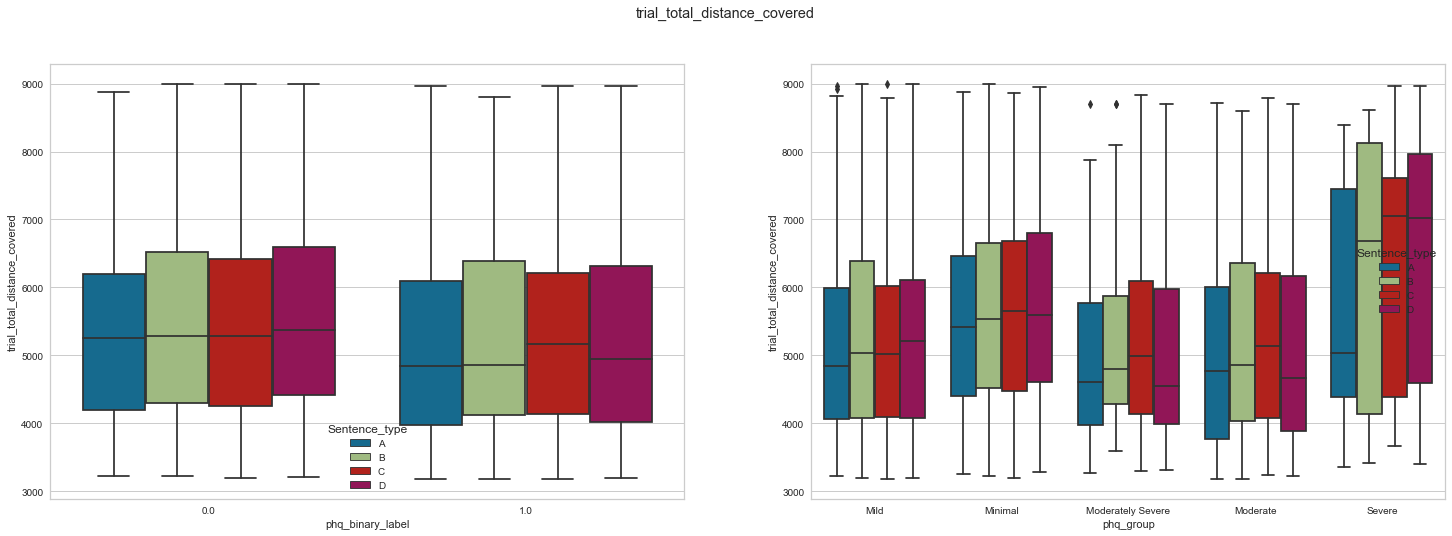

sentence_pupil_diameter_mean 7020.97699287103 3735.785532994924


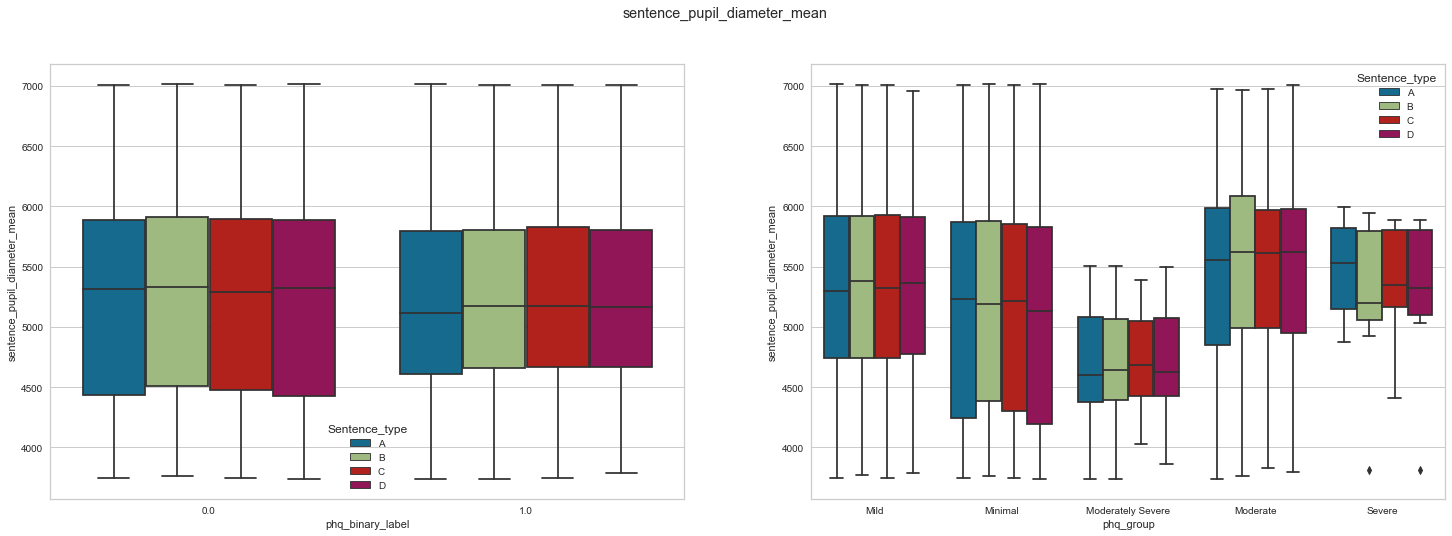

sentence_pupil_diameter_vec_mean 7020.97699287103 3735.785532994924


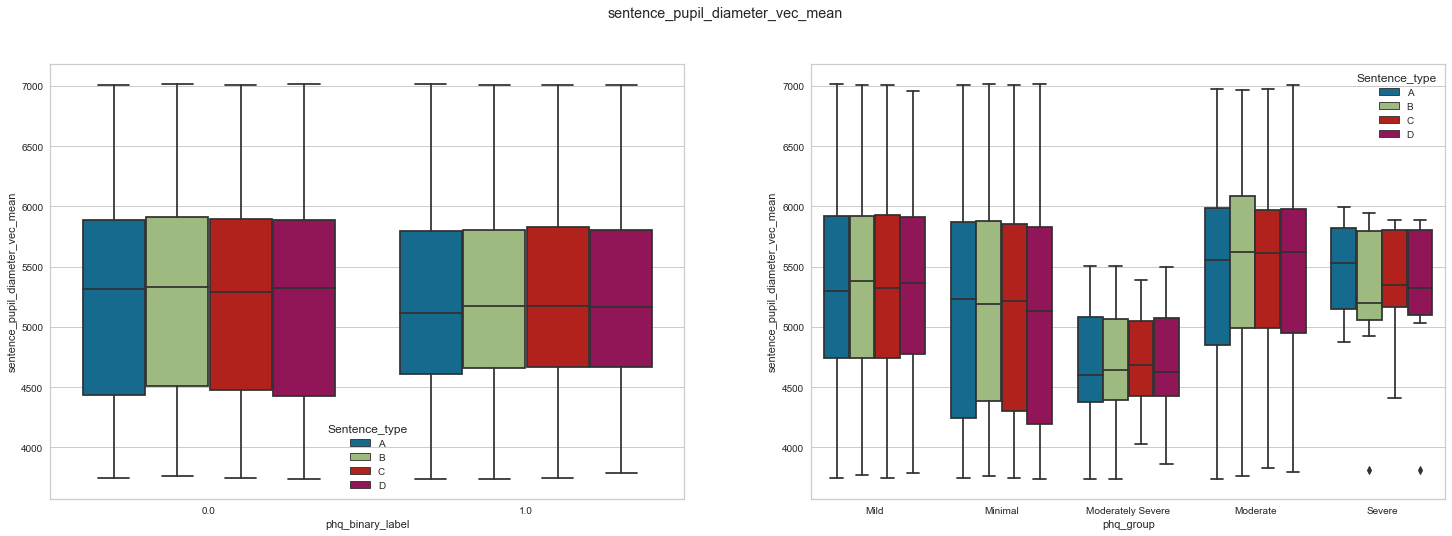

In [79]:
for f in ET_features:
    fig, axs = plt.subplots(1,2, figsize= [25,8])
    h = df[f].quantile(0.9)
    l = df[df[f] > 0][f].quantile(0.1)
    print(f, h,l)
    df1 = df[(df[f] < h) & (df[f] > l)]
    sns.boxplot(data = df1, hue = 'Sentence_type' , x = 'phq_binary_label', y=f , hue_order = ['A','B','C','D'], ax=axs[0])
    sns.boxplot(data = df1, hue = 'Sentence_type' , x = 'phq_group', y=f, hue_order = ['A','B','C','D'], ax = axs[1])
    # sns.boxplot(data = df1, hue = 'phq_binary_label' , x = 'Sentence_type', y=f , hue_order = ['A','B','C','D'], ax=axs[1])
    # sns.boxplot(data = df1, hue = 'phq_group' , x = 'Sentence_type', y=f, hue_order = ['A','B','C','D'], ax = axs[0])
    plt.suptitle(f)
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from yellowbrick.features import PCA

le = LabelEncoder()
df_to_use = df[ET_features + ['phq_group', 'phq_binary_label','Sentence_type']].dropna().reset_index(drop=True)

for sen_type, sentype_df in df_to_use.groupby("Sentence_type"):
    yle = le.fit_transform(sentype_df['phq_binary_label'])

    for proj in [2]:
        print("proj = ", proj)
        visualizer = PCA(scale=True, projection=proj, classes = ['Low PHQ', "High PHQ"])
        visualizer.fit_transform(sentype_df[ET_features],
                                 yle)
        visualizer.show()

proj =  2


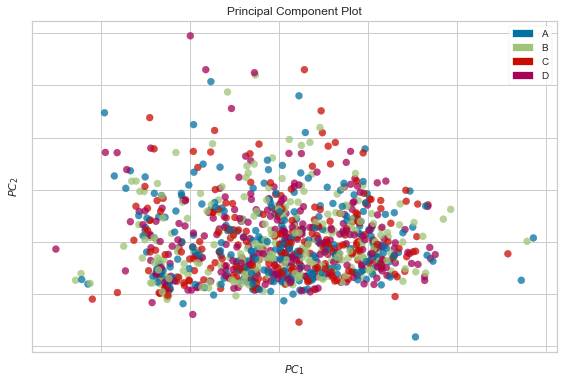

In [85]:
# for sen_type, sentype_df in df_to_use.groupby("Sentence_type"):
yle = le.fit_transform(df_to_use['Sentence_type'])

for proj in [2]:
    print("proj = ", proj)
    visualizer = PCA(scale=True, projection=proj, classes=['A','B','C','D'])
    visualizer.fit_transform(df_to_use[ET_features],
                             yle)
    visualizer.show()

proj =  2


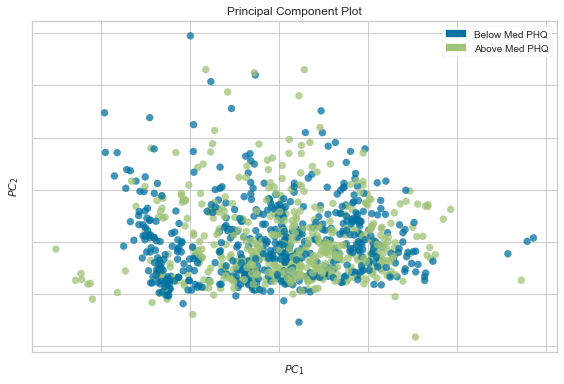

In [89]:
yle = le.fit_transform(df_to_use['phq_binary_label'])

for proj in [2]:
    print("proj = ", proj)
    visualizer = PCA(scale=True, projection=proj, classes = ['Below Med PHQ', 'Above Med PHQ'])
    visualizer.fit_transform(df_to_use[ET_features],
                             yle)
    visualizer.finalize(PC_1="ASD")
    visualizer.show()